In [179]:
#import numpy and pandas libraries
import pandas as pd
#import the dataset from downloaded files
grades_data=pd.read_csv("C:\\Users\\Mary Mbaire\\Downloads\\grades.csv")
grades_data

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


Pandas table format imports data as a dataframe.
You can use the DataFrame's loc method to retrieve data for a specific index value, like this.

In [142]:
# Get the data for index value 5
grades_data.loc[5]

Name          Vicky
StudyHours      1.0
Grade           3.0
Name: 5, dtype: object

You can use the DataFrame's loc method to retrieve data for a specific index value, like this.

In [143]:
# Get the data for index value 0-5
grades_data.loc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0


In addition to being able to use the loc method to find rows based on the index, you can use the iloc method to find rows based on their ordinal position in the DataFrame (regardless of the index):

In [144]:
# Get the data for index value 0-5
grades_data.iloc[0:5]

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In addition to being able to use the loc method to find rows based on the index, you can use the iloc method to find rows based on their ordinal position in the DataFrame (regardless of the index):

In [177]:
grades_data.loc[2,'Grade']

47.0

In addition to being able to use the loc method to find rows based on the index, you can use the iloc method to find rows based on their ordinal position in the DataFrame (regardless of the index):

In [178]:
grades_data.loc[grades_data['Name']=='Aisha']

,Name,StudyHours,Grade
21,Aisha,12.0,64.0


Dealing with missing data

One of the most common issues data scientists need to deal with is incomplete or missing data. So how would we know that the DataFrame contains missing values? You can use the isnull method to identify which individual values are null, like this:

In [180]:
grades_data.isnull()

,Name,StudyHours,Grade
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


Of course, with a larger DataFrame, it would be inefficient to review all of the rows and columns individually, so we can get the sum of missing values for each column like this:

In [181]:
grades_data.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

So now we know that there's one missing StudyHours value and two missing Grade values.

To see them in context, we can filter the DataFrame to include only rows where any of the columns (axis 1 of the DataFrame) are null.

In [182]:
#show rows in columns where data is missing
grades_data[grades_data.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


When the DataFrame is retrieved, the missing numeric values show up as NaN (not a number).

So now that we've found the null values, what can we do about them?

One common approach is to impute replacement values. For example, if the number of study hours is missing, we could just assume that the student studied for an average amount of time and replace the missing value with the mean study hours. To do this, we can use the fillna method, like this:

In [183]:
grades_data.StudyHours =grades_data.StudyHours.fillna(grades_data.StudyHours.mean())
grades_data

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


Alternatively, it might be important to ensure that you only use data you know to be absolutely correct. In this case, you can drop rows or columns that contain null values by using the dropna method. For example, we'll remove rows (axis 0 of the DataFrame) where any of the columns contain null values

In [184]:
#drop rows with missing data
grades_data = grades_data.dropna(axis=0, how='any')
grades_data

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


Explore data in the DataFrame

Now that we've cleaned up the missing values, we're ready to explore the data in the DataFrame. Let's start by comparing the mean study hours and grades.

In [153]:
# Get the mean study hours using to column name as an index
mean_study = grades_data['StudyHours'].mean()

# Get the mean grade using the column name as a property (just to make the point!)
mean_grade = grades_data.Grade.mean()

# Print the mean study hours and mean grade
print('Average weekly study hours: {:.2f}\nAverage grade: {:.2f}'.format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


In [154]:
# Get students who studied for the mean or more hours
grades_data[grades_data.StudyHours > mean_study]

,Name,StudyHours,Grade
1,Joann,11.50,50.0
3,Rosie,16.00,97.0
6,Frederic,11.50,53.0
9,Giovanni,14.50,74.0
10,Francesca,15.50,82.0
11,Rajab,13.75,62.0
14,Jenny,15.50,70.0
19,Skye,12.00,52.0
20,Daniel,12.50,63.0
21,Aisha,12.00,64.0


In [155]:
# What was their mean grade?
grades_data[grades_data.StudyHours > mean_study].Grade.mean()

66.7

Let's assume that the passing grade for the course is 60.

We can use that information to add a new column to the DataFrame that indicates whether or not each student passed.

First, we'll create a Pandas Series containing the pass/fail indicator (True or False), and then we'll concatenate that series as a new column (axis 1) in the DataFrame.

In [156]:
passes  = pd.Series(grades_data['Grade'] >= 60)
grades_data = pd.concat([grades_data, passes.rename("Pass")], axis=1)
grades_data

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
5,Vicky,1.00,3.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True


For example, you can use the groupby method to group the student data into groups based on the Pass column you added previously and to count the number of names in each group. In other words, you can determine how many students passed and failed.

In [157]:
print(grades_data.groupby(grades_data.Pass).Name.count())

Pass
False    15
True      7
Name: Name, dtype: int64


DataFrames are amazingly versatile and make it easy to manipulate data. Many DataFrame operations return a new copy of the DataFrame, so if you want to modify a DataFrame but keep the existing variable, you need to assign the result of the operation to the existing variable. For example, the following code sorts the student data into descending order by Grade and assigns the resulting sorted DataFrame to the original grades_data variable.

In [158]:
# Create a DataFrame with the data sorted by Grade (descending)
grades_data = grades_data.sort_values('Grade', ascending=False)

# Show the DataFrame
grades_data

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


DataFrames provide a great way to explore and analyze tabular data, but sometimes a picture is worth a thousand rows and columns. The Matplotlib library provides the foundation for plotting data visualizations that can greatly enhance your ability to analyze the data.

Let's start with a simple bar chart that shows the grade of each student.

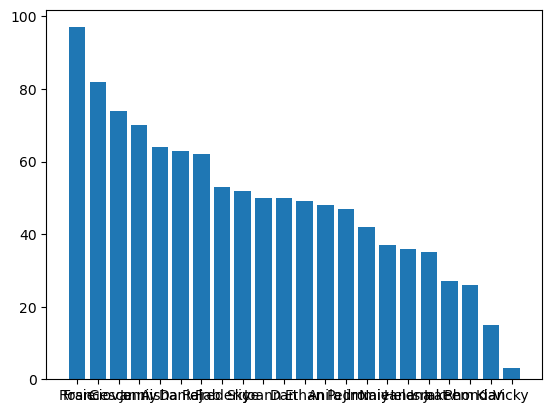

In [159]:
# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt

# Create a bar plot of name vs grade
plt.bar(x=grades_data.Name, height=grades_data.Grade)

# Display the plot
plt.show()

Note that you used the pyplot class from Matplotlib to plot the chart. This class provides many ways to improve the visual elements of the plot. For example, the following code:

* Specifies the color of the bar chart
* Adds a title to the chart (so we know what it represents)
* Adds labels to the X and Y axes (so we know which axis shows which data)
* Adds a grid (to make it easier to determine the values for the bars)
* Rotates the X markers (so we can read them)

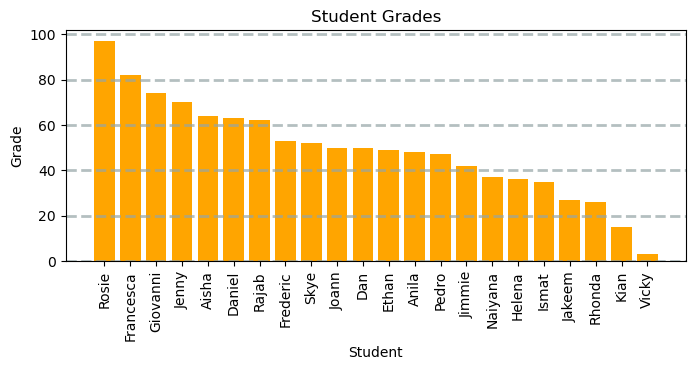

In [160]:
# Create a Figure
fig = plt.figure(figsize=(8,3))

# Create a bar plot of name vs grade
plt.bar(x=grades_data.Name, height=grades_data.Grade, color='orange')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

A figure can contain multiple subplots, each on its own axis.

For example, the following code creates a figure with two subplots: one is a bar chart showing student grades, and the other is a pie chart comparing the number of passing grades to non-passing grades.

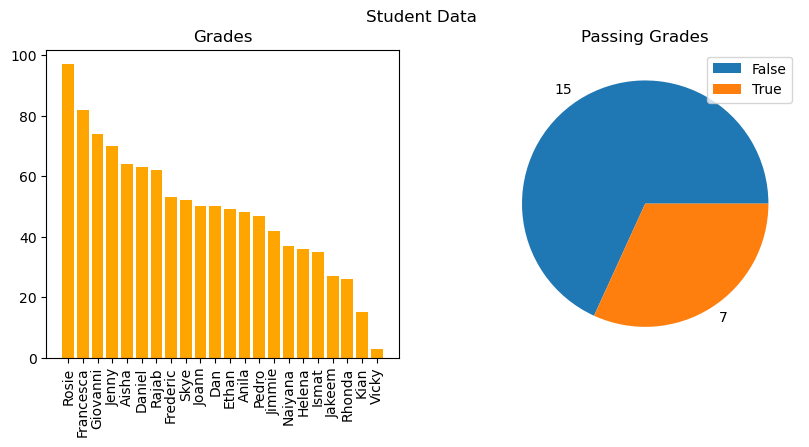

In [161]:
from matplotlib.ticker import FixedLocator, FixedFormatter

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=grades_data.Name, height=grades_data.Grade, color='orange')
ax[0].set_title('Grades')
# Set tick positions and labels for x-axis
ax[0].set_xticks(range(len(grades_data.Name)))
ax[0].set_xticklabels(grades_data.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = grades_data['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
plt.show()

Descriptive statistics and data distribution

When examining a variable (for example, a sample of student grades), data scientists are particularly interested in its distribution (in other words, how all the different grade values are spread across the sample). The starting point for this exploration is often to visualize the data as a histogram and see how frequently each value for the variable occurs.

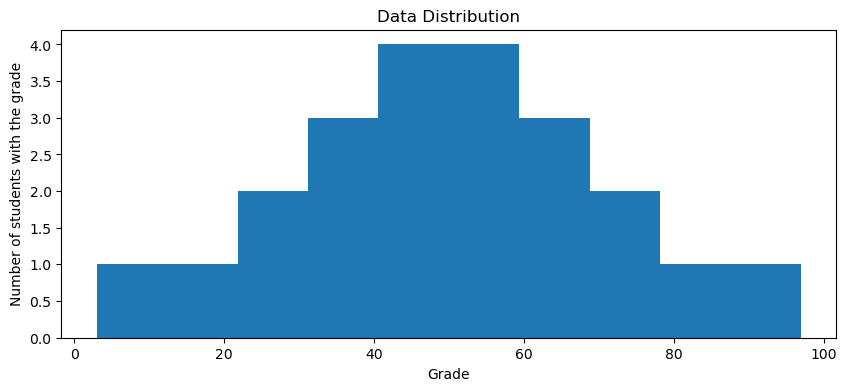

In [162]:
# Get the variable to examine
var_data = grades_data['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of students with the grade')

# Show the figure
plt.show()

Another way to visualize the distribution of a variable is to use a box plot (sometimes called a box-and-whiskers plot). Let's create one for the grade data.

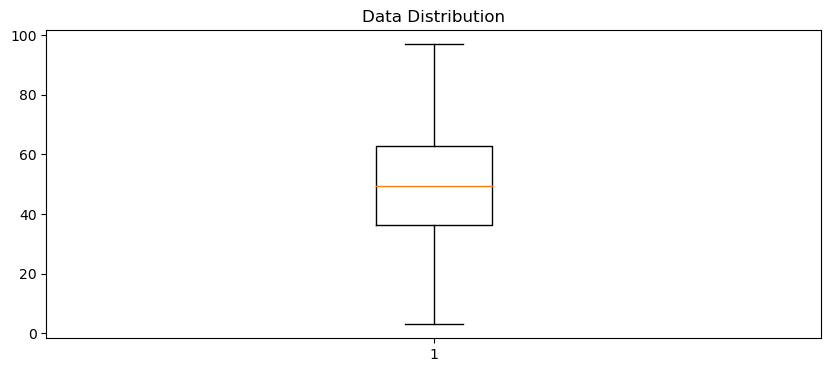

In [163]:
# Get the variable to examine
var = grades_data['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
plt.show()

For learning, it's useful to combine histograms and box plots, with the box plot's orientation changed to align it with the histogram. (In some ways, it's helpful to think of the histogram as a "front elevation" view of the distribution, and the box plot as a "plan" view of the distribution from above.)

In [164]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Number of students with the grade')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    plt.suptitle('Data Distribution')

    # Show the figure
    plt.show()


Show distributions for grades

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



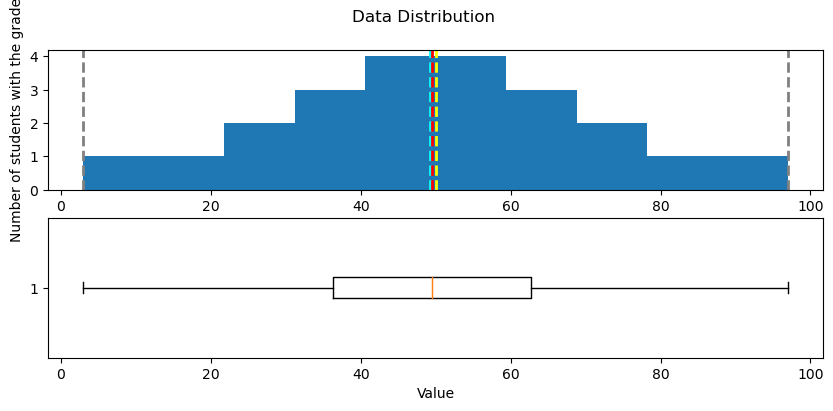

In [185]:
# Get the variable to examine
col = grades_data['Grade']
# Call the function
show_distribution(col)

Show distributions for study hours

Minimum:1.00
Mean:10.52
Median:10.00
Mode:9.00
Maximum:16.00



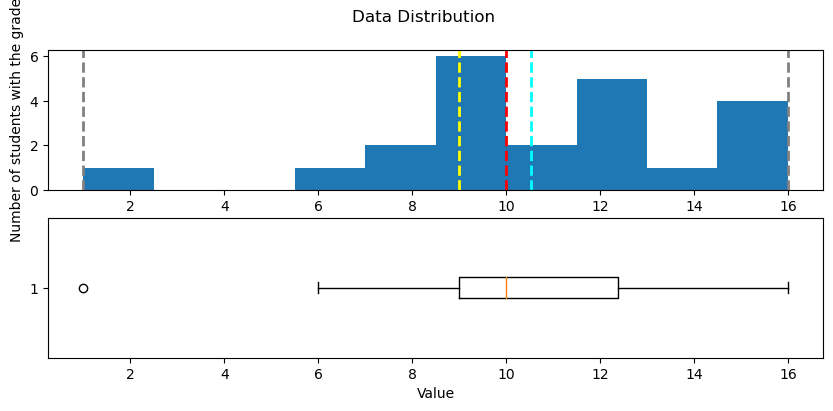

In [186]:
# Get the variable to examine
col = grades_data['StudyHours']
# Call the function
show_distribution(col)

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only begin at around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an o, indicating that it is statistically an outlier: a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. Let's see what the distribution looks like without it.

Minimum:6.00
Mean:10.98
Median:10.00
Mode:9.00
Maximum:16.00



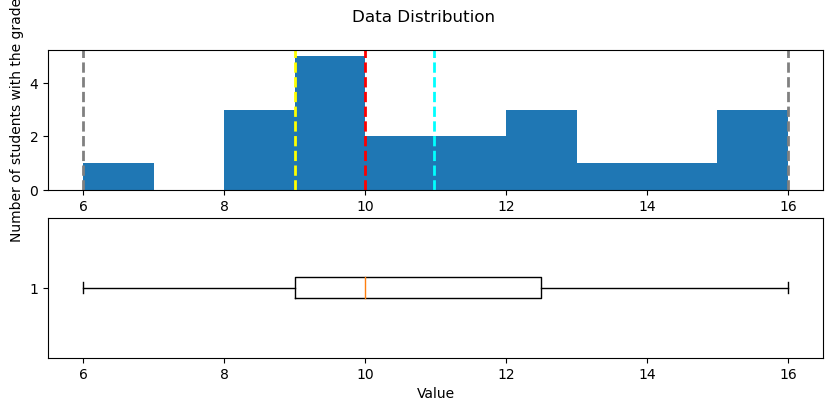

In [167]:
# Get the variable to examine
# We will only get students who have studied more than one hour
col = grades_data[grades_data.StudyHours>1]['StudyHours']

# Call the function
show_distribution(col)

In [168]:
for col_name in ['Grade','StudyHours']:
    col = grades_data[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 472.54
 - Std.Dev: 21.74

StudyHours:
 - Range: 15.00
 - Variance: 12.16
 - Std.Dev: 3.49


The descriptive statistics we've used to understand the distribution of the student data variables are the basis of statistical analysis. Because they're such an important part of exploring your data, there's a built-in describe method of the DataFrame object that returns the main descriptive statistics for all numeric columns.

In [169]:
grades_data.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


Comparing data

Now that we know something about the statistical distribution of the data in your dataset, we're ready to examine your data to identify any apparent relationships between variables.

First of all, let's get rid of any rows that contain outliers so that we have a sample that is representative of a typical class of students. We identified that the StudyHours column contains some outliers with extremely low values, so we'll remove those rows.

In [170]:
df_sample = grades_data[grades_data['StudyHours']>1]
df_sample

,Name,StudyHours,Grade,Pass
3,Rosie,16.00,97.0,True
10,Francesca,15.50,82.0,True
9,Giovanni,14.50,74.0,True
14,Jenny,15.50,70.0,True
21,Aisha,12.00,64.0,True
20,Daniel,12.50,63.0,True
11,Rajab,13.75,62.0,True
6,Frederic,11.50,53.0,False
19,Skye,12.00,52.0,False
1,Joann,11.50,50.0,False


Comparing numeric and categorical variables


The data includes two numeric variables (StudyHours and Grade) and two categorical variables (Name and Pass). Let's start by comparing the numeric StudyHours column to the categorical Pass column to see if there's an apparent relationship between the number of hours studied and a passing grade.

To make this comparison, let's create box plots showing the distribution of StudyHours for each possible Pass value (true and false).

<Axes: title={'center': 'StudyHours'}, xlabel='Pass'>

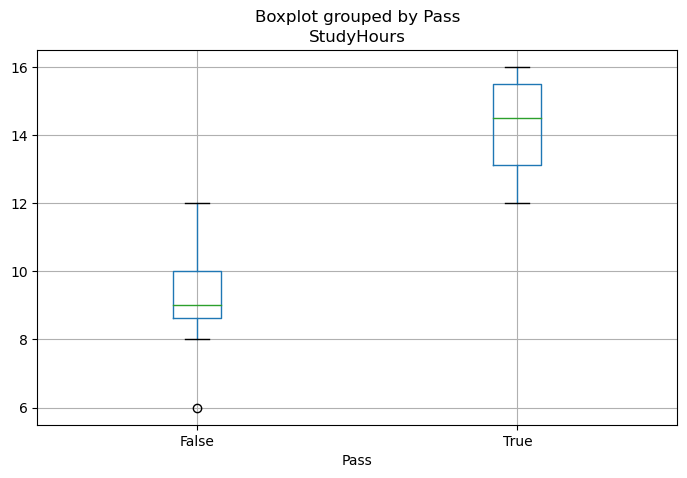

In [171]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(8,5))

Comparing numeric variables


Now let's compare two numeric variables. We'll start by creating a bar chart that shows both grade and study hours.

<Axes: xlabel='Name'>

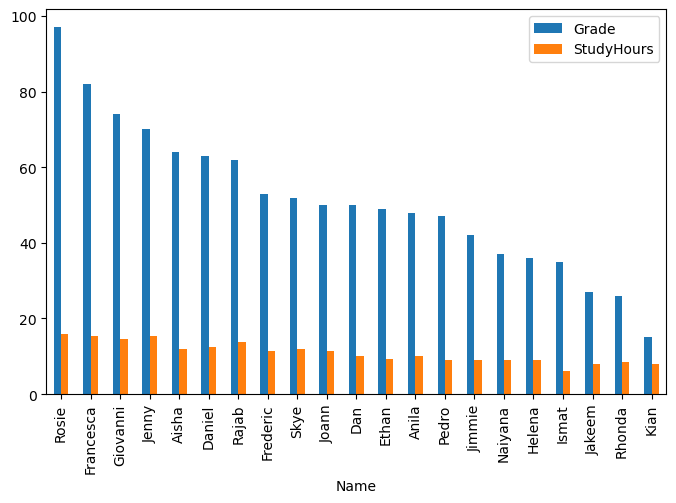

In [172]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

The chart shows bars for both grade and study hours for each student, but it's not easy to compare because the values are on different scales. A grade is measured in grade points (and ranges from 3 to 97), and study time is measured in hours (and ranges from 1 to 16).

A common technique when dealing with numeric data in different scales is to normalize the data so that the values retain their proportional distribution but are measured on the same scale. To accomplish this, we'll use a technique called MinMax scaling that distributes the values proportionally on a scale of 0 to 1. You could write the code to apply this transformation, but the Scikit-Learn library provides a scaler to do it for you.

<Axes: xlabel='Name'>

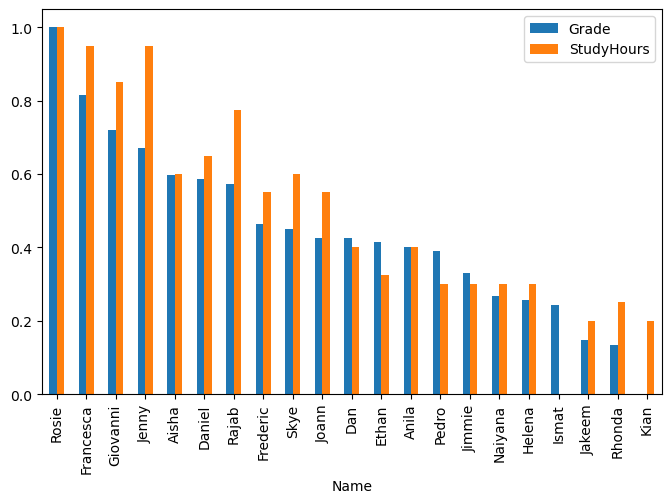

In [173]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

With the data normalized, it's easier to see an apparent relationship between grade and study time. It's not an exact match, but it definitely seems like students with higher grades tend to have studied more.

So there seems to be a correlation between study time and grade. In fact, there's a statistical correlation measurement we can use to quantify the relationship between these columns.

The correlation statistic is a value between -1 and 1 that indicates the strength of a relationship. Values above 0 indicate a positive correlation (high values of one variable tend to coincide with high values of the other), while values below 0 indicate a negative correlation (high values of one variable tend to coincide with low values of the other). In this case, the correlation value is close to 1, showing a strongly positive correlation between study time and grade.

In [187]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789675